In [13]:
import numpy as np
from numpy import random as rnd
import pandas as pd 
import matplotlib.pyplot as plt
import math as math
import statistics as st

#Import dataframe from excel sheet with facies and their values
df=pd.read_excel('facies.xlsx')

#Make lists of every facies A-C 
A=df['Facies A'].tolist()
B=df['Facies B'].tolist()
C=[x for x in (df['Facies C'].tolist()) if str(x)!='nan'] #Remove occurences of nan in C

# MEDIAN

In [14]:
A_median=st.median(A)
B_median=st.median(B)
C_median=st.median(C)

A_medians=[]
B_medians=[]

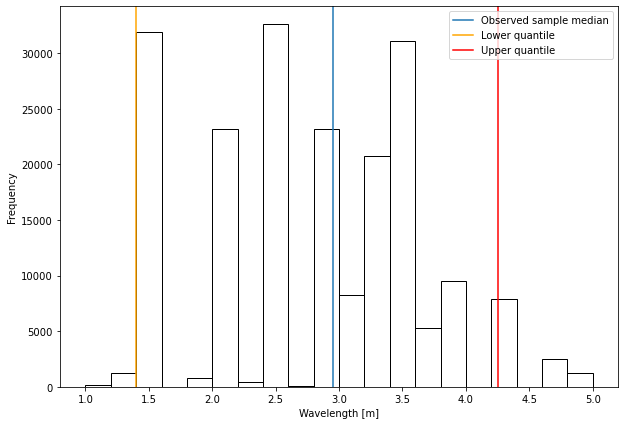

In [21]:
n=len(A)
n_boots=10**5
for i in range(n_boots):
    boot=rnd.choice(A,n)
    A_medians.append(st.median(boot))
    
bottomA=np.quantile(A_medians,0.025)
topA=np.quantile(A_medians,0.975)

plt.figure(figsize=(10,7))
plt.hist(A_medians,bins=20, fill=False, edgecolor='black')
#plt.title('Distribution of bootstrap sample MEDIAN for FA2-A')
plt.axvline(A_median,label='Observed sample median')
plt.axvline(bottomA,color='orange',label='Lower quantile')
plt.axvline(topA,color='red',label='Upper quantile')
plt.legend()
plt.xlabel('Wavelength [m]')
plt.ylabel('Frequency')
plt.show()

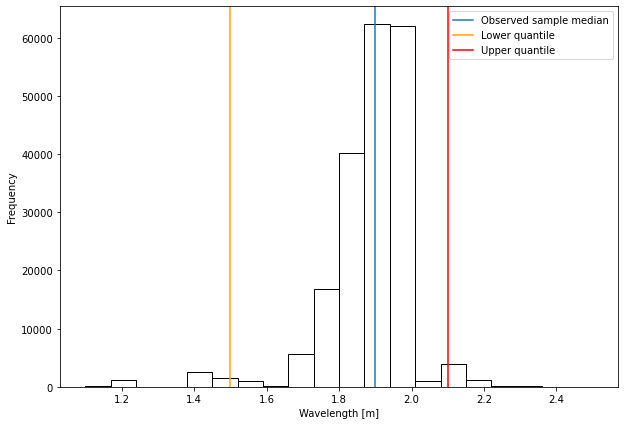

In [22]:
n=len(B)
n_boots=10**5
for i in range(n_boots):
    boot=rnd.choice(B,n)
    B_medians.append(st.median(boot))
    
bottomB=np.quantile(B_medians,0.025)
topB=np.quantile(B_medians,0.975)

plt.figure(figsize=(10,7))
plt.hist(B_medians,bins=20, fill=False, edgecolor='black')
#plt.title('Distribution of bootstrap sample MEDIAN for FA2-B')
plt.axvline(B_median,label='Observed sample median')
plt.axvline(bottomB,color='orange',label='Lower quantile')
plt.axvline(topB,color='red',label='Upper quantile')
plt.legend()
plt.xlabel('Wavelength [m]')
plt.ylabel('Frequency')
plt.show()

In [17]:
m_A=st.median(A)

m_B=st.median(B)

m_C=st.median(C)

m=[m_A,m_B,m_C]

upperA=topA-m_A
lowerA=m_A-bottomA

upperB=topB-m_B
lowerB=m_B-bottomB

error=[[lowerA,lowerB],[upperA,upperB],1]

#Names of the facies to plot along x-axis
f=['FA2-A','FA2-B', 'FA1']
#Array with count of number bars 
x_pos=np.arange(len(f))

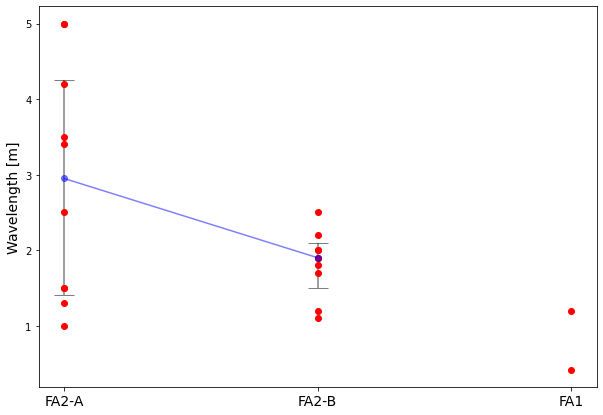

In [18]:
plt.figure(figsize=(10,7))
plt.errorbar(x_pos[0:2],m[0:2],error[0:2],alpha=0.5,ecolor='black',capsize=10,marker='o',c='blue')
plt.xticks(x_pos,f,size=14)
plt.ylabel('Wavelength [m]',size=14)
plt.plot(np.ones(len(A))*x_pos[0],A, marker='o',linewidth=0, c='red')
plt.plot(np.ones(len(B))*x_pos[1],B, marker='o',linewidth=0, c='red')
plt.plot(np.ones(len(C))*x_pos[2],C, marker='o',linewidth=0, c='red')
plt.show()

In [19]:
print(m_A, topA, bottomA)
print(m_B,topB,bottomB)

2.95 4.25 1.4
1.9 2.1 1.5


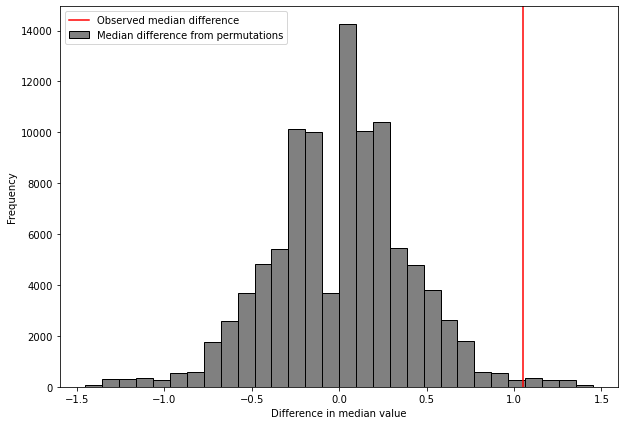

In [27]:
#Save the size of the observed samples
l_A=len(A)
l_B=len(B)

#Pool the values into one
pooled=np.concatenate([A,B])

#Set a number of repetitions, which is how many permutations you want to generate. Should be a high number. 
n=10**5

#Preallocate an array to store differences in mean values
medians=np.zeros(n)

diff_median=m_A-m_B

#Do the permutation and calculation of difference in mean n times
for i in range(n):
    shuf_pooled=rnd.permutation(pooled)
    #Collect new values for "A" and "B", temp means "temporary"
    tempA=shuf_pooled[0:l_A]
    tempB=shuf_pooled[l_A:]
    medians[i]=st.median(tempA)-st.median(tempB)

#Plot the distribution of differences in mean 

plt.figure(figsize=(10,7))
plt.hist(medians,bins=30,color='grey',edgecolor='black', label='Median difference from permutations')
plt.axvline(diff_median, label='Observed median difference', color='red')
plt.xlabel('Difference in median value')
plt.ylabel('Frequency')
#plt.title('T-test distribution')
plt.legend()
plt.show()

In [28]:
#Calculate the p-value
p_value_median=medians[medians>=diff_median].size/n
#p_value_median=p_value_median*100 #in percent 
p_value_median

0.01068